## Import Libraries and Import Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt


In [3]:
!pip install openpyxl

In [2]:
file_path=r"C:\Users\HP\Desktop\Prediction_Data.xlsx"



In [3]:
sheet_name='vw_ChurnData'
data=pd.read_excel(file_path,sheet_name=sheet_name)
data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,99898-MAH,Female,39,No,Maharashtra,2,14,NaN,Yes,Yes,...,Bank Withdrawal,65.199997,3687.850098,0.0,0,87.779999,3775.629883,Stayed,Others,Others
6003,99912-WES,Female,60,Yes,West Bengal,11,26,Deal 4,Yes,No,...,Bank Withdrawal,19.650000,244.800003,0.0,0,430.690002,675.489990,Stayed,Others,Others
6004,99942-KER,Male,59,Yes,Kerala,8,18,NaN,Yes,No,...,Bank Withdrawal,69.699997,69.699997,0.0,0,21.520000,91.220001,Churned,Attitude,Attitude of service provider
6005,99942-TEL,Female,34,No,Telangana,0,34,NaN,Yes,Yes,...,Credit Card,70.900002,4677.100098,0.0,0,1880.020020,6557.120117,Stayed,Others,Others


In [4]:
#Data Processing
data=data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)


In [5]:
columns_to_encode=['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method','Monthly_Charge',	'Total_Charges','Total_Refunds','Total_Extra_Data_Charges','Total_Long_Distance_Charges','Total_Revenue']


In [6]:
# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])


In [7]:
data['Customer_Status']

0        Stayed
1        Stayed
2       Churned
3       Churned
4        Stayed
         ...   
6002     Stayed
6003     Stayed
6004    Churned
6005     Stayed
6006     Stayed
Name: Customer_Status, Length: 6007, dtype: object

In [8]:
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

In [9]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
5632,1,23,0,2,9,6,5,1,0,0,...,0,1,1,0,35,487,0,0,371,504
5838,0,59,1,5,1,36,1,1,1,1,...,1,0,0,1,1050,4915,0,0,3179,4911
2348,1,37,0,13,3,35,1,1,0,0,...,0,2,0,1,28,2154,0,0,3983,3142
5332,1,24,1,19,10,12,4,1,0,1,...,1,0,0,1,324,86,0,0,25,71
5661,0,48,1,21,1,13,3,1,1,1,...,1,0,1,0,1477,3102,0,0,2922,3180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,30,0,0,12,27,4,1,1,1,...,1,0,0,0,1351,1348,0,0,1460,1398
5191,0,72,1,5,7,35,5,1,1,1,...,1,1,1,0,1320,5257,0,0,2204,5064
5226,0,19,0,0,10,11,5,1,1,1,...,0,0,1,0,1061,1350,0,6,1384,1455
5390,0,20,1,5,3,2,3,1,0,0,...,0,1,1,1,23,541,0,0,2239,1219


In [10]:
y_train

5632    0
5838    0
2348    0
5332    1
5661    0
       ..
3772    0
5191    1
5226    0
5390    0
860     0
Name: Customer_Status, Length: 4805, dtype: int64

## Train Random Forest Model

In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [12]:
# Train the model

rf_model.fit(X_train, y_train)

 

#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 


Confusion Matrix:
[[784  60]
 [140 218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       844
           1       0.78      0.61      0.69       358

    accuracy                           0.83      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.83      0.83      0.83      1202



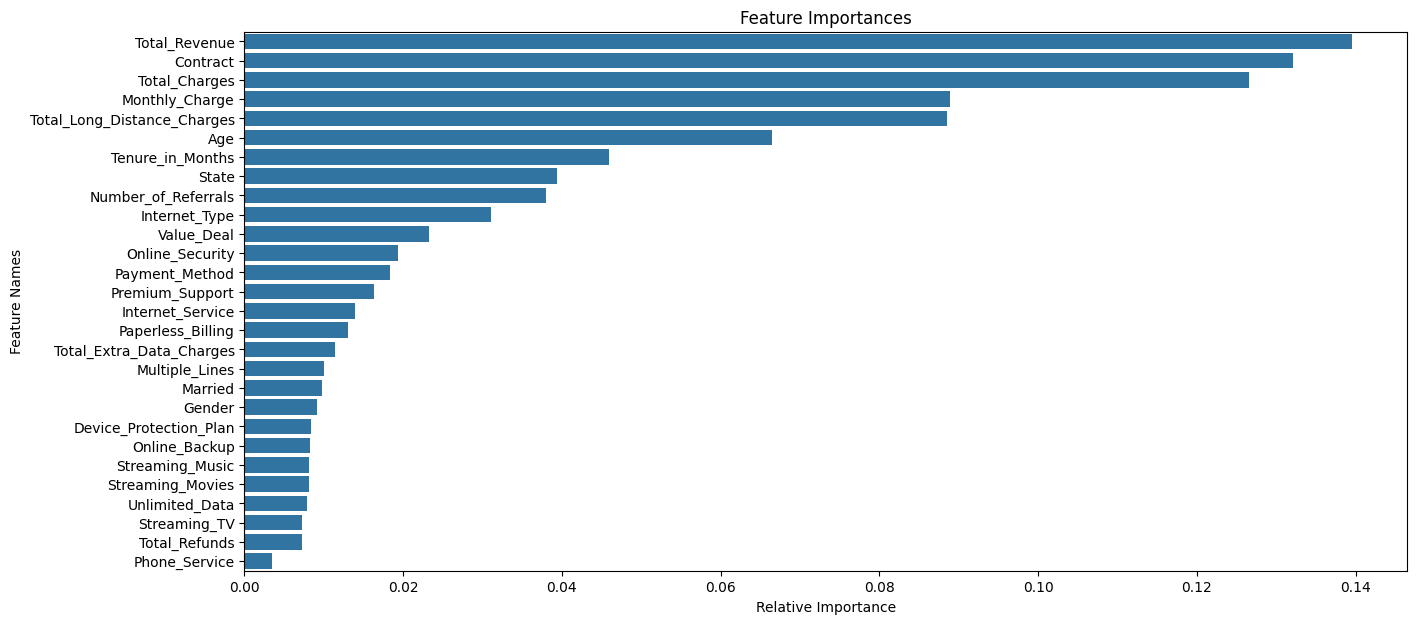

In [13]:

# Feature Selection using Feature Importance
import seaborn as sns
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 7))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [14]:
#remove every feature that has less importance than 0.1



# Step 1: Create a DataFrame for easy handling
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Step 4: Filter features with importance >= 0.1
important_features = feature_importance_df[feature_importance_df['Importance'] >= 0.01]['Feature'].tolist()

# Step 5: Drop less important features from X_train and X_test
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# (Optional) Check dropped columns
dropped_features = feature_importance_df[feature_importance_df['Importance'] < 0.01]['Feature'].tolist()
print("Dropped Features (Importance < 0.01):")
print(dropped_features)




Dropped Features (Importance < 0.01):
['Gender', 'Married', 'Phone_Service', 'Online_Backup', 'Device_Protection_Plan', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Total_Refunds']


In [15]:
print(feature_importance_df[feature_importance_df['Importance'] >= 0.01])

                        Feature  Importance
1                           Age    0.066483
3                         State    0.039386
4           Number_of_Referrals    0.038027
5              Tenure_in_Months    0.045969
6                    Value_Deal    0.023217
8                Multiple_Lines    0.010072
9              Internet_Service    0.013968
10                Internet_Type    0.031089
11              Online_Security    0.019326
14              Premium_Support    0.016349
19                     Contract    0.132105
20            Paperless_Billing    0.013101
21               Payment_Method    0.018363
22               Monthly_Charge    0.088937
23                Total_Charges    0.126517
25     Total_Extra_Data_Charges    0.011460
26  Total_Long_Distance_Charges    0.088461
27                Total_Revenue    0.139483


In [16]:
# Re-train Random Forest on important features only
rf_model.fit(X_train_filtered, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_filtered)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[782  62]
 [137 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       844
           1       0.78      0.62      0.69       358

    accuracy                           0.83      1202
   macro avg       0.82      0.77      0.79      1202
weighted avg       0.83      0.83      0.83      1202



In [31]:
import pandas as pd

# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\HP\Desktop\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Optional: Make a copy of the data
original_data = new_data.copy()

new_data


 



,Customer_id,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
1,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
2,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
3,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,Credit Card,20.350000,20.350000,0.0,0,44.090000,64.440002,Joined,Others,Others
4,15349-UTT,Male,47,Yes,Uttar Pradesh,9,12,Deal 5,Yes,Yes,...,Bank Withdrawal,50.150002,50.150002,0.0,0,39.869999,90.019997,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,98767-WES,Female,26,No,West Bengal,14,7,NaN,Yes,No,...,Credit Card,20.049999,20.049999,0.0,0,11.100000,31.150000,Joined,Others,Others
407,98788-TAM,Male,58,Yes,Tamil Nadu,4,16,Deal 5,Yes,No,...,Mailed Check,20.049999,39.250000,0.0,0,13.700000,52.950001,Joined,Others,Others
408,99855-MAH,Female,50,Yes,Maharashtra,5,29,NaN,Yes,No,...,Bank Withdrawal,69.699997,135.199997,0.0,0,31.340000,166.539993,Joined,Others,Others
409,99862-BIH,Female,30,No,Bihar,12,9,Deal 5,Yes,No,...,Bank Withdrawal,74.000000,74.000000,0.0,0,23.700001,97.699997,Joined,Others,Others


In [32]:
print(new_data.columns)

Index([' Customer_id', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')


In [33]:
# Extract customer IDs column
Customer_ids = new_data[' Customer_id']

# Display the first few rows of the fetched data
print(new_data.head())

   Customer_id  Gender  Age Married          State  Number_of_Referrals  \
0    12056-WES    Male   27      No    West Bengal                    2   
1    12136-RAJ  Female   25     Yes      Rajasthan                    2   
2    12257-ASS  Female   39      No          Assam                    9   
3    14567-TAM    Male   43      No     Tamil Nadu                    1   
4    15349-UTT    Male   47     Yes  Uttar Pradesh                    9   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                20        NaN           Yes             No  ...   
1                35        NaN           Yes             No  ...   
2                 1        NaN           Yes             No  ...   
3                 9        NaN           Yes             No  ...   
4                12     Deal 5           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      90.400002    268.450012           0.0   
1  Bank Wi

In [34]:

 # Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop([' Customer_id', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
new_data

 



,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,Male,27,No,West Bengal,2,20,NaN,Yes,No,Yes,...,Yes,Month-to-Month,No,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015
1,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,No,...,No,Month-to-Month,No,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000
2,Female,39,No,Assam,9,1,NaN,Yes,No,No,...,No,Month-to-Month,Yes,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000
3,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,No,...,No,Month-to-Month,No,Credit Card,20.350000,20.350000,0.0,0,44.090000,64.440002
4,Male,47,Yes,Uttar Pradesh,9,12,Deal 5,Yes,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,50.150002,50.150002,0.0,0,39.869999,90.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Female,26,No,West Bengal,14,7,NaN,Yes,No,No,...,No,Month-to-Month,No,Credit Card,20.049999,20.049999,0.0,0,11.100000,31.150000
407,Male,58,Yes,Tamil Nadu,4,16,Deal 5,Yes,No,No,...,No,Month-to-Month,Yes,Mailed Check,20.049999,39.250000,0.0,0,13.700000,52.950001
408,Female,50,Yes,Maharashtra,5,29,NaN,Yes,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,69.699997,135.199997,0.0,0,31.340000,166.539993
409,Female,30,No,Bihar,12,9,Deal 5,Yes,No,Yes,...,Yes,Month-to-Month,No,Bank Withdrawal,74.000000,74.000000,0.0,0,23.700001,97.699997


In [35]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 



In [37]:
print("Model trained on:", rf_model.feature_names_in_)
print("New data columns:", new_data.columns.tolist())

Model trained on: ['Age' 'State' 'Number_of_Referrals' 'Tenure_in_Months' 'Value_Deal'
 'Multiple_Lines' 'Internet_Service' 'Internet_Type' 'Online_Security'
 'Premium_Support' 'Contract' 'Paperless_Billing' 'Payment_Method'
 'Monthly_Charge' 'Total_Charges' 'Total_Extra_Data_Charges'
 'Total_Long_Distance_Charges' 'Total_Revenue']
New data columns: ['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue']


In [38]:
# Align columns
new_data = new_data[rf_model.feature_names_in_]

# Now predict
new_predictions = rf_model.predict(new_data)


In [39]:
original_data['Customer_Status_Predicted']=new_predictions


In [40]:


original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

In [ ]:
original_data.to_csv(r"C:\Users\HP\Desktop\Churn Analysis Prediction\predicted_data.csv", index=False)
